## Ensemble
- 앙상블 모델 최소 2가지 사용
- 전처리&모델 성능결과 출력
- 데이터셋: https://www.kaggle.com/competitions/bike-sharing-demand/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8


In [2]:
test = pd.read_csv("biketest.csv", parse_dates = ["datetime"])
print(test.shape)

(6493, 9)


In [3]:
train = pd.read_csv("biketrain.csv", parse_dates = ["datetime"])
print(train.shape)
train.head()

# count가 y값. 
# 가장 영향을 주는 것? 시간. 밤 12시에는 아무도 안빌려
# 시계열에서 가장 중요한 것은 시간 
# datetime이란 시간은 파싱?해야 한다. 
# 구간이니까 학습못시키므로 선언할 때 파싱할거야 알려야 함. 

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 날짜데이터 파싱하기

In [4]:
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['minute'] = test.datetime.dt.minute
test['second'] = test.datetime.dt.second
test['dayofweek'] = test.datetime.dt.dayofweek

In [5]:
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second
train['dayofweek'] = train.datetime.dt.dayofweek

train.head()
# 불러올때 파싱을 선언했기에 dt쓸 수 있는 것

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


### 탐색적 분석

<Axes: xlabel='day', ylabel='count'>

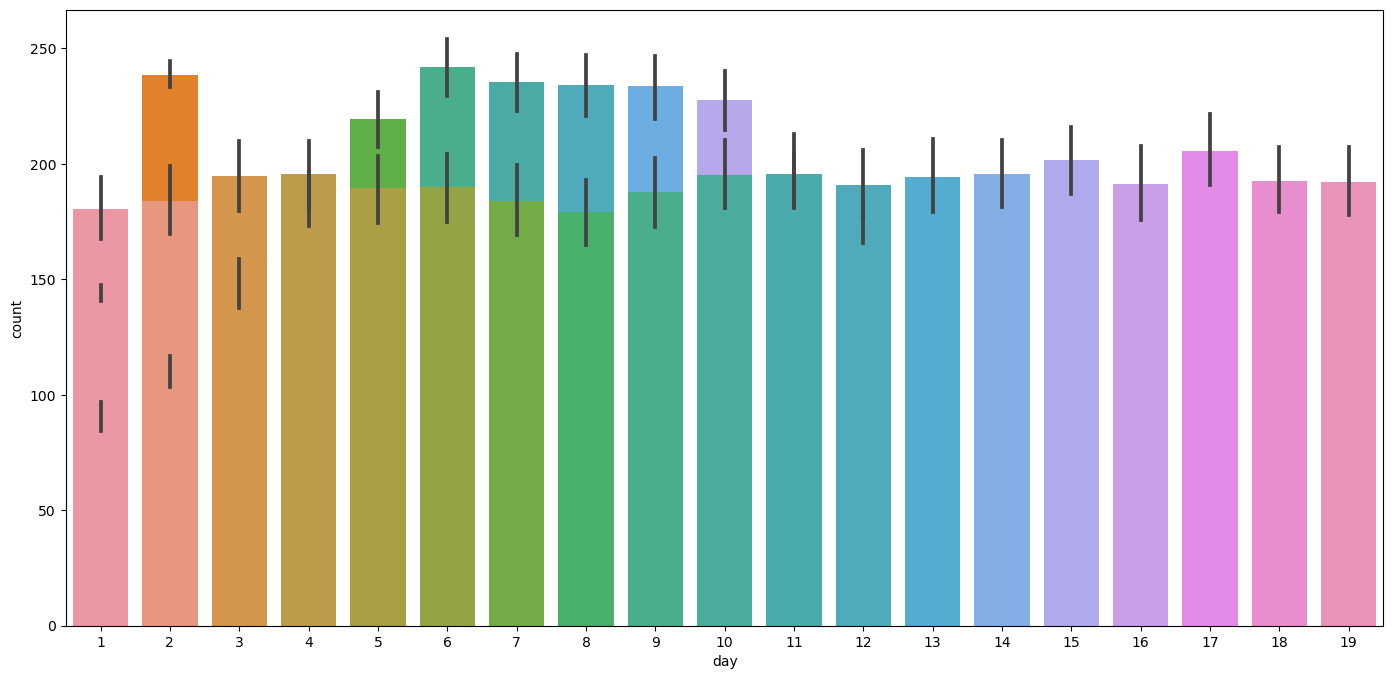

In [6]:
sns.barplot(data = train, x = 'year', y= 'count')
# 이렇게 보면 11년보다 12년에 더 많이 자전거를 빌린 듯 하다 
sns.barplot(data = train, x = 'month', y= 'count')
sns.barplot(data = train, x = 'day', y= 'count')
# day는 약간 이상해. 19일까지 학습, 
# 나머지는 테스트. 그러니까 이러면 학습시키면 안됨. 
# 20일은 여기서 한번도 못 본 데이터이므로 핛브시키면 잘못도니 것. 

<Axes: xlabel='hour', ylabel='count'>

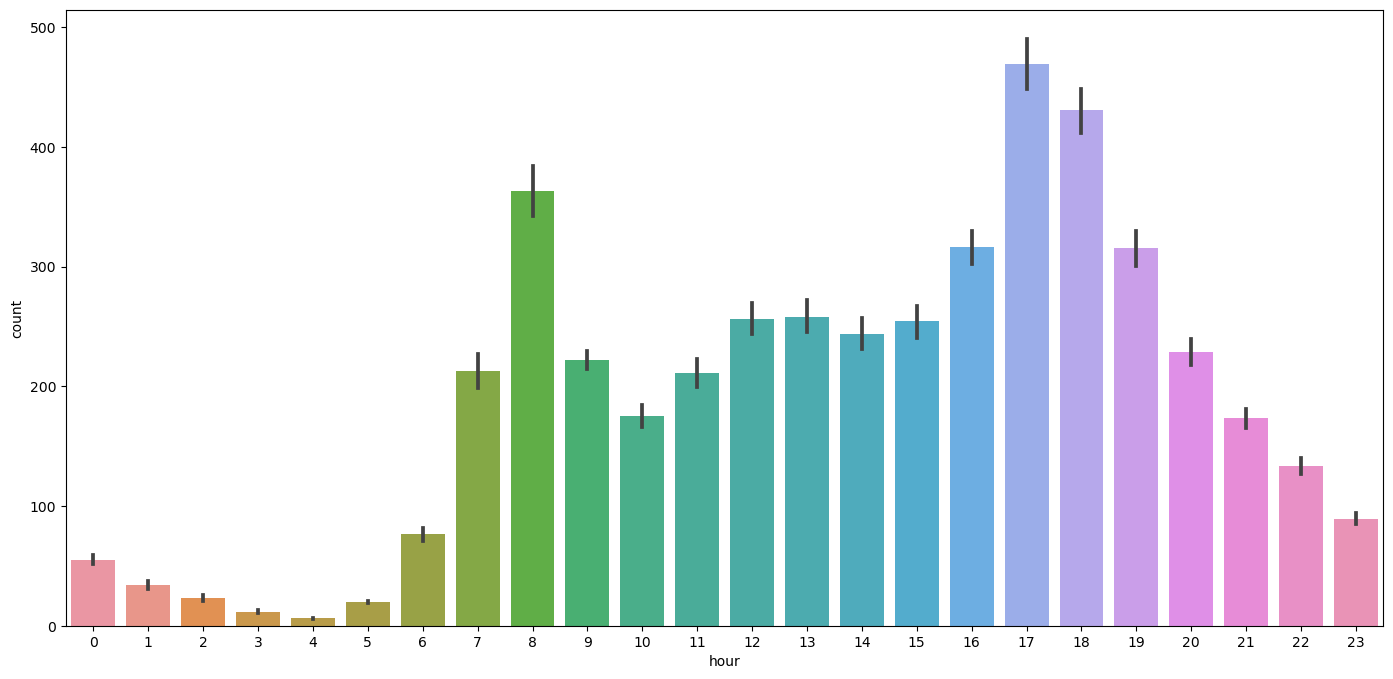

In [7]:
sns.barplot(data = train, x = 'hour', y= 'count')


<Axes: xlabel='dayofweek', ylabel='count'>

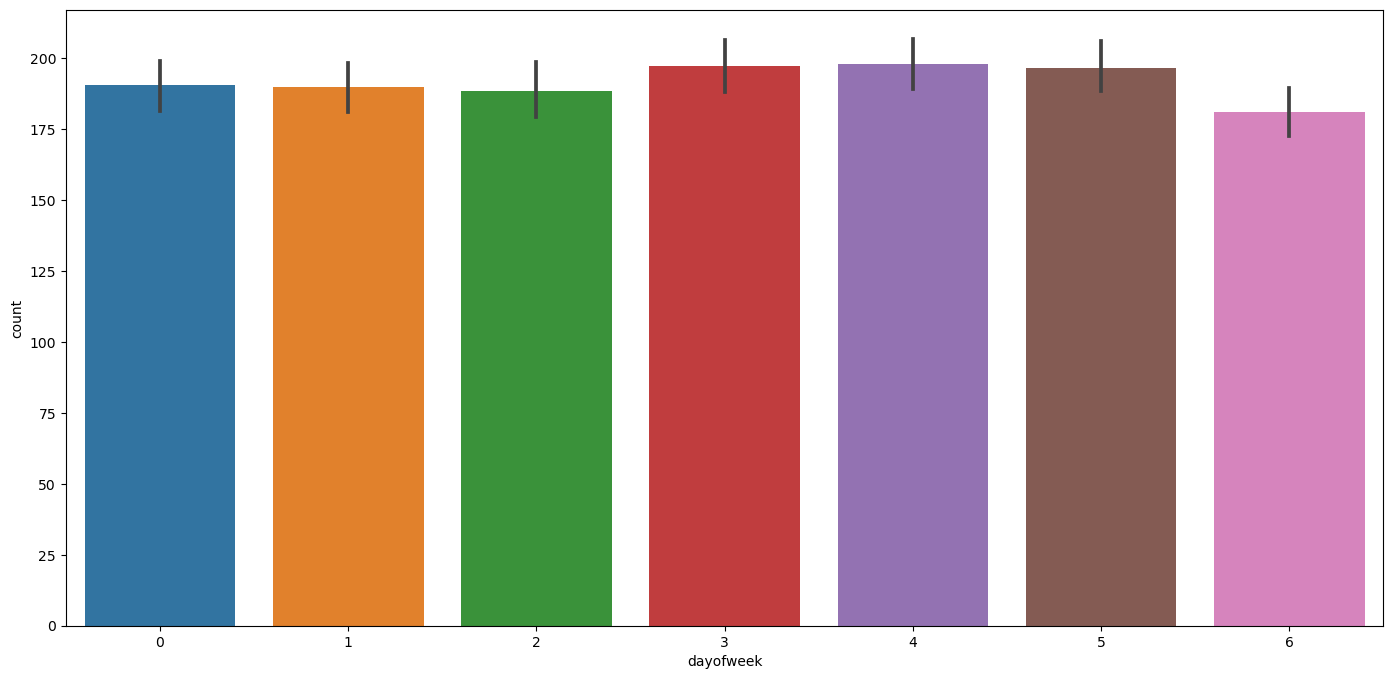

In [8]:
sns.barplot(data = train, x = 'dayofweek', y= 'count')

<Axes: xlabel='hour', ylabel='count'>

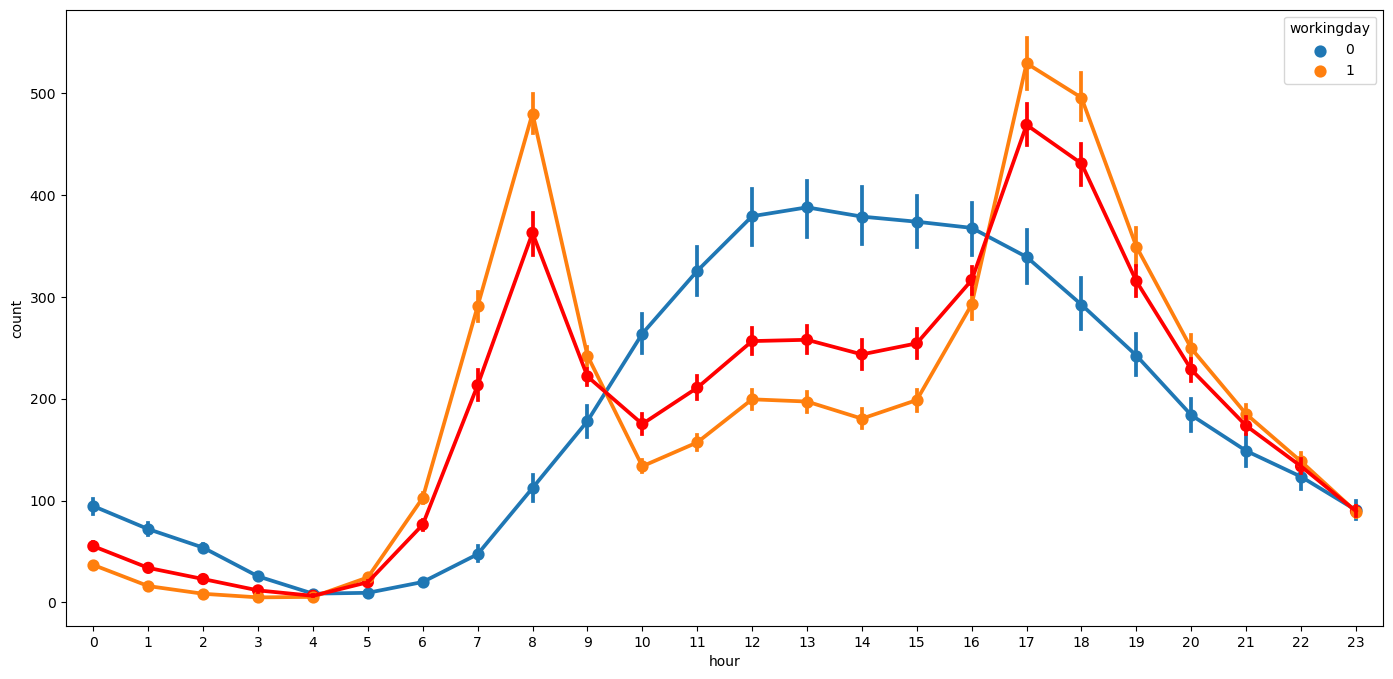

In [9]:
# 주중과 주말의 대여수요의 차이는 시간대로 클까?
sns.pointplot(data = train, x ='hour', y='count', hue = 'workingday' )
sns.pointplot(data=train, x= 'hour', y='count', color = 'red')

# 함께 돌리는 게 중요

<Axes: xlabel='hour', ylabel='count'>

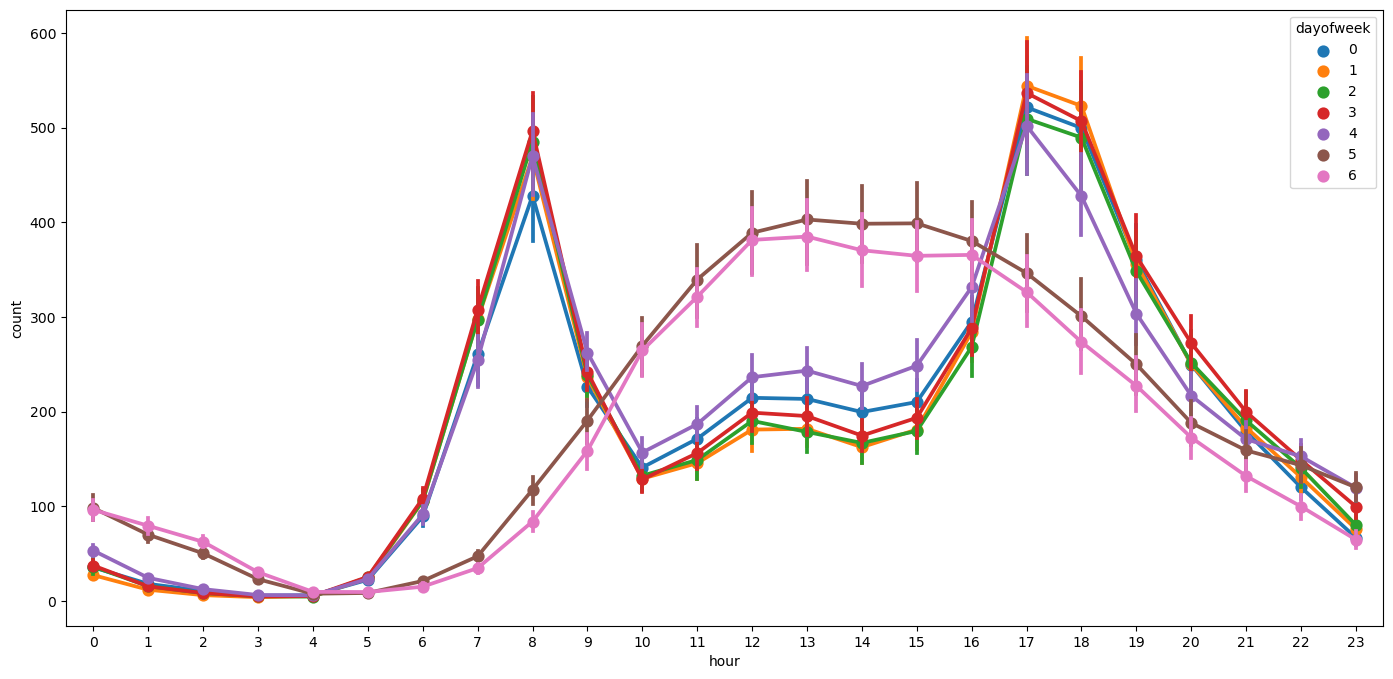

In [10]:
sns.pointplot(data = train, x ='hour', y='count', hue = 'dayofweek' )

In [11]:
# 년도, 달을 합쳐보면?
def concat_year_month(datetime): 
    return '{0}-{1}'.format(datetime.year, datetime.month)

In [12]:
test['year_month'] = test.datetime.apply(concat_year_month)

In [13]:
train['year_month'] = train.datetime.apply(concat_year_month)

In [14]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


<Axes: xlabel='year_month', ylabel='count'>

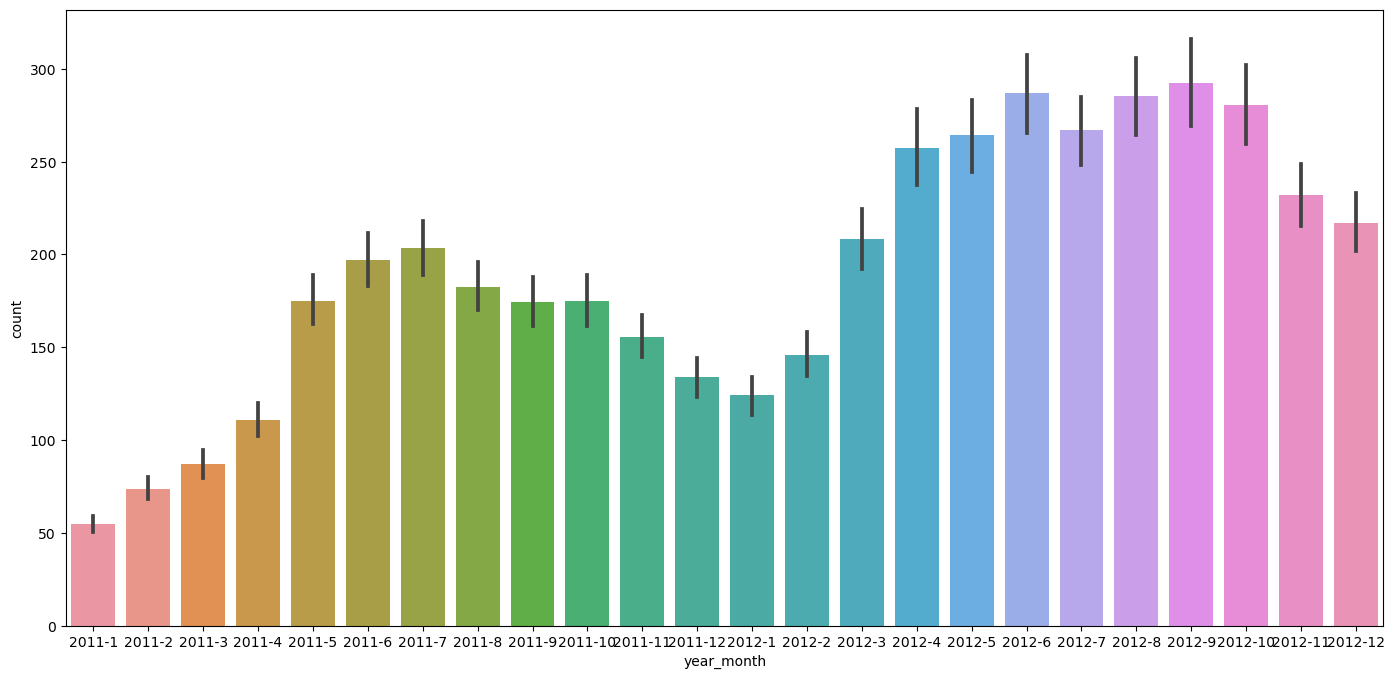

In [15]:
sns.barplot(data=train, x= 'year_month', y='count')
# 뭉뜽그려 year만 보거나 month만 보면 안돼
# 전년도 1월과 올해 1월이 다른 수요ㅇ를 보임. 

In [16]:
train.info()
# 다 정제되어 있음. 
# but 뭘 넣고 뭘 뺄지 고민이 필요함. 
# 일단 상관관계, 공분산, R^2높으면서 ... 등 ㅔ체크

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

<Axes: >

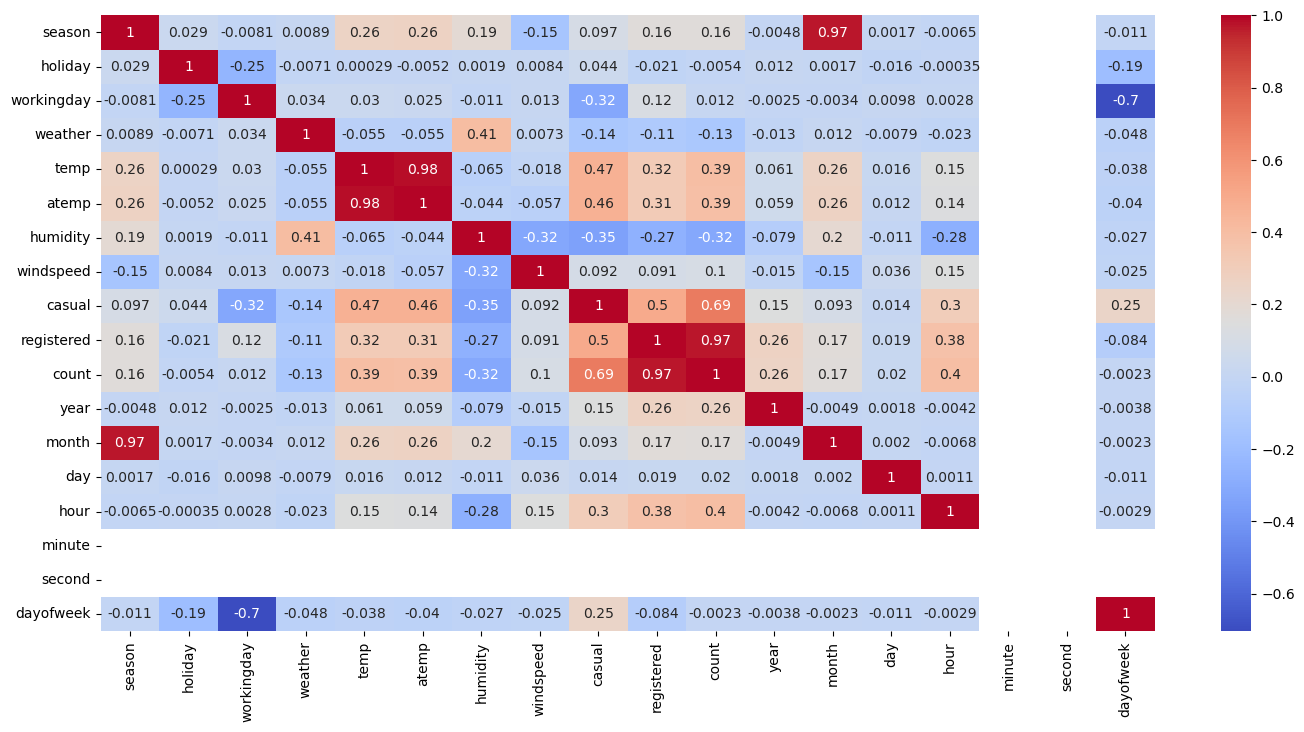

In [17]:
sns.heatmap(train.corr(),annot=True, cmap = 'coolwarm')

In [18]:
train.corrwith(train['count']).sort_values()

humidity     -0.317371
weather      -0.128655
holiday      -0.005393
dayofweek    -0.002283
workingday    0.011594
day           0.019826
windspeed     0.101369
season        0.163439
month         0.166862
year          0.260403
atemp         0.389784
temp          0.394454
hour          0.400601
casual        0.690414
registered    0.970948
count         1.000000
minute             NaN
second             NaN
dtype: float64

In [19]:
#보면 temp랑 atemp둘 1이거나 매우 가깝. 그러므로 하나만 넣어. 
# 상관관계 보면 관계가 작은 atemp버린다? 

In [20]:
from statsmodels.formula.api import ols

In [21]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'year_month'],
      dtype='object')

In [22]:
my_formula = 'count ~ season + holiday + weather + temp + humidity + windspeed + year + month + hour + dayofweek'

In [23]:
model = ols(my_formula, data = train).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     689.0
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:28:35   Log-Likelihood:                -69374.
No. Observations:               10886   AIC:                         1.388e+05
Df Residuals:                   10875   BIC:                         1.389e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.663e+05   5504.516    -30.203      0.000   -1.77e+05   -1.55e+05
season        -7.7120      5.182     -1.488      0.137     -17.870       2.446
holiday       -6.8849      8.368     -0.823      0.411     -23.287       9.517
weather       -5.2406      2.397     -2.186      0.029      -9.939      -0.542
temp           6.6539      0.184     36.157      0.000       6.293       7.015
humidity      -2.0121      0.088    -22.914      0.000      -2.184      -1.840
windspeed      0.4403      0.179      2.460      0.014       0.089       0.791
year          82.6731      2.736     30.213      0.000      77.309      88.037
month          9.9612      1.684      5.915      0.000       6.660      13.262
hour           7.8100      0.208     37.518      0.000       7.402       8.218
dayofweek      0.2825      0.693      0.408      0.683      -1.075       1.640
==============================================================================
Omnibus:                     2095.588   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3991.414
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       4.785   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


In [29]:
X_test = test[test.columns.difference(['count', 'casual', 'registered',
                                          'year_month','atemp','datetime','minute','second'])]

In [30]:
X_train.columns

Index(['day', 'dayofweek', 'holiday', 'hour', 'humidity', 'month', 'season',
       'temp', 'weather', 'windspeed', 'workingday', 'year'],
      dtype='object')

In [28]:
# 다 넣은 거
X_train = train[train.columns.difference(['count', 'casual', 'registered',
                                          'year_month','atemp','datetime','minute','second'])]

In [31]:
X_train

,day,dayofweek,holiday,hour,humidity,month,season,temp,weather,windspeed,workingday,year
0,1,5,0,0,81,1,1,9.84,1,0.0000,0,2011
1,1,5,0,1,80,1,1,9.02,1,0.0000,0,2011
2,1,5,0,2,80,1,1,9.02,1,0.0000,0,2011
3,1,5,0,3,75,1,1,9.84,1,0.0000,0,2011
4,1,5,0,4,75,1,1,9.84,1,0.0000,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,19,2,0,19,50,12,4,15.58,1,26.0027,1,2012
10882,19,2,0,20,57,12,4,14.76,1,15.0013,1,2012
10883,19,2,0,21,61,12,4,13.94,1,15.0013,1,2012
10884,19,2,0,22,61,12,4,13.94,1,6.0032,1,2012


In [32]:
X_train.columns

Index(['day', 'dayofweek', 'holiday', 'hour', 'humidity', 'month', 'season',
       'temp', 'weather', 'windspeed', 'workingday', 'year'],
      dtype='object')

In [33]:
y_train = train['count']

In [34]:
y_train


0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

## 모델링 및 학습
- randomforestregressor
- gradientboostregressor

In [48]:
# 데이터셋 분할 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state= 31)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### model1 = RandomForestRegressor

In [50]:
model = RandomForestRegressor(n_estimators = 1000, 
                             max_depth = 19,
                             max_features = 0.9,
                             random_state = 31,
                             n_jobs = -1)

In [51]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, max_features=0.9, n_estimators=1000,
                      n_jobs=-1, random_state=31)

In [53]:
score_train = regressor.score(X_train, y_train)
score_test = regressor.score(X_test, y_test)

print("train score: %f" %score_train)
print("validation score: %f" %score_test)

train score: 0.983904
validation score: 0.982991


### model2 = GradientBoostingRegressor

In [55]:
model2 = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.05
                                    , max_depth = 5
                                    , min_samples_leaf = 15
                                    , min_samples_split = 10
                                    , random_state = 42)
#model.fit(x, y)
model2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=1000,
                          random_state=42)

In [56]:
score_train = regressor.score(X_train, y_train)
score_test = regressor.score(X_test, y_test)

print("train score: %f" %score_train)
print("validation score: %f" %score_test)

train score: 0.986148
validation score: 0.955791
